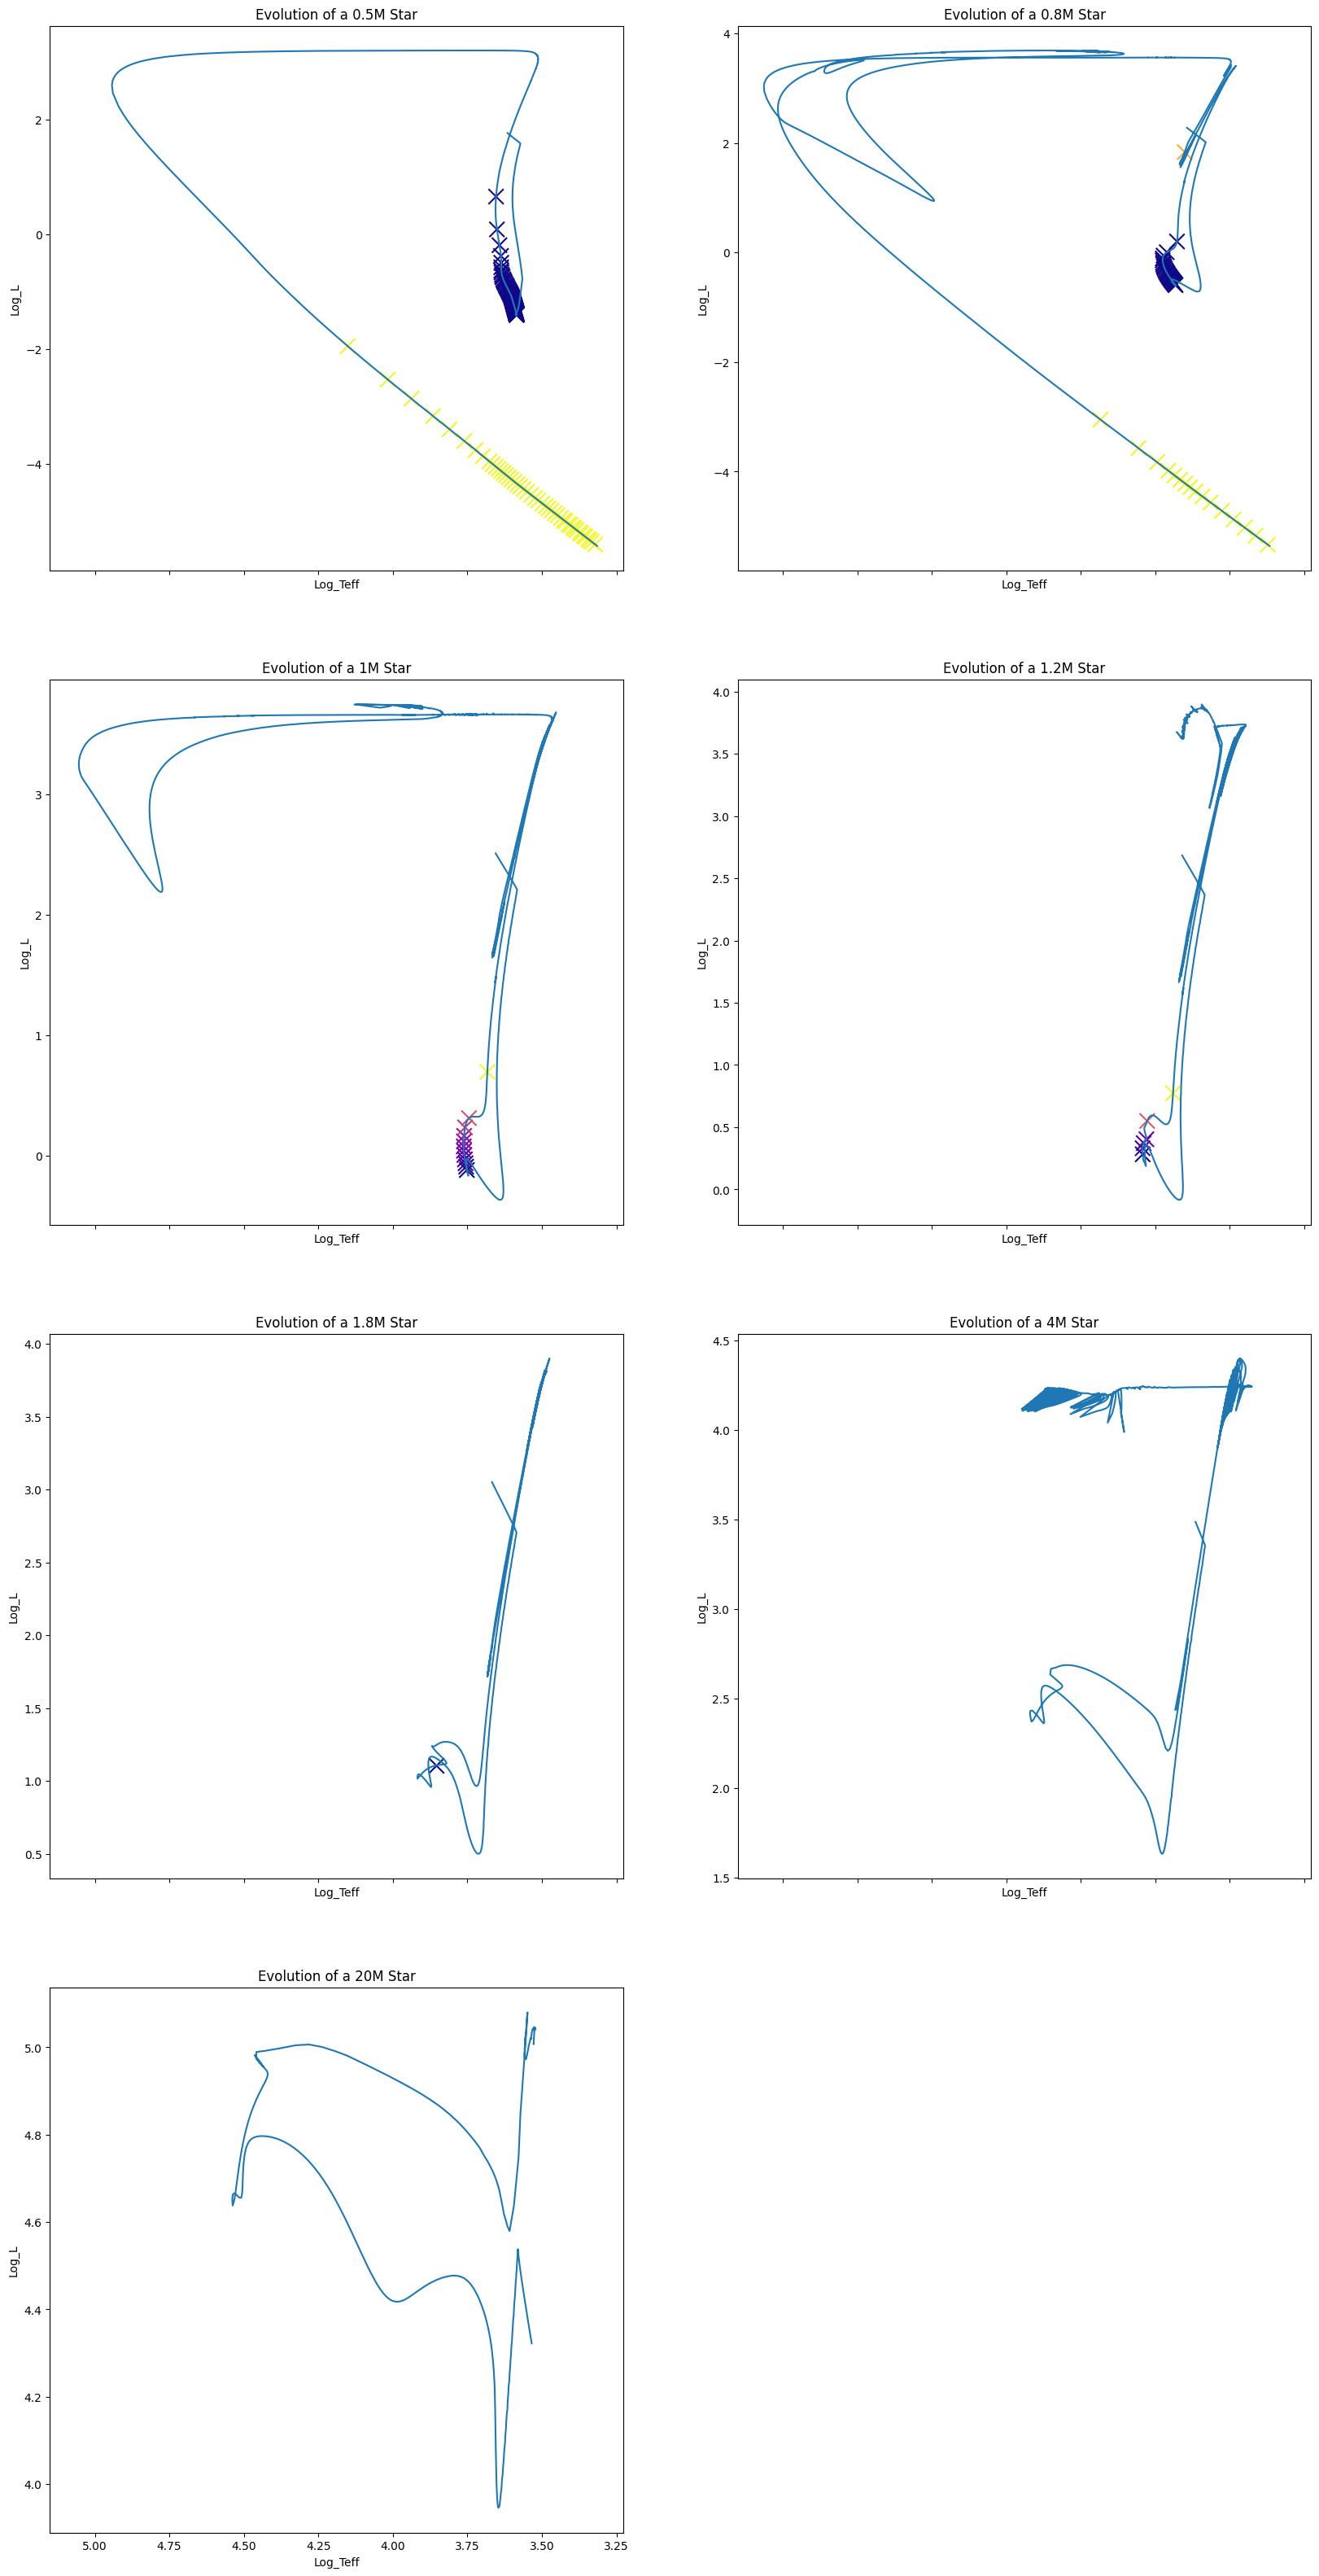

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
gyr=1e9
xs=["x","x1","x2","x3","x4","x5","x6"]
ys=["y","y1","y2","y3","y4","y5","y6"]

files=["trimmed_history_0.5.csv","trimmed_history_0.8.data","trimmed_history_1.data","trimmed_history_1.2.data","trimmed_history_1.8.data","trimmed_history_4.data","trimmed_history_20.data"]
titles = [
    "Evolution of a 0.5M Star",
    "Evolution of a 0.8M Star",
    "Evolution of a 1M Star",
    "Evolution of a 1.2M Star",
    "Evolution of a 1.8M Star",
    "Evolution of a 4M Star",
    "Evolution of a 20M Star"]

def plot():
    dfs = [
    pd.read_csv(f, sep=r"\s+", skiprows=5)
    for f in files]


    fig,axes= plt.subplots(4,2,figsize=(20, 40), sharex=True)
    axes=axes.flatten()
    ax,ax1,ax2,ax3,ax4,ax5,ax6=axes[:7]


    for i, df in enumerate(dfs):
        ax = axes[i]
        ax.plot(df["log_Teff"], df["log_L"])
        max_age=df["star_age"].max()
        marks=np.arange(gyr,max_age,gyr)#Marks points from one billion years to max age of star with a step of one gyr
        closest=[
        np.abs(df["star_age"]-billion_years).idxmin()#Finds closest age to a billion years
        for billion_years in marks
    ]
        ax.scatter(
            df.loc[closest,"log_Teff"],
            df.loc[closest,"log_L"],
            marker = "x",
            s=180,
            c=closest,
            cmap="plasma",

        )
        ax.invert_xaxis()
        ax.set_title(titles[i])
        ax.set_ylabel("Log_L")
        ax.set_xlabel("Log_Teff")
    axes[7].axis("off")
    plt.show()

plot()
#---------------------------------------------------------------------------------------------------


